## SALES PREDICTION & PRICE OPTIMIZATION IN RETAIL ANALYTICS

CHINMAY BAKE

In [153]:
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
dfs = pd.read_csv(r'C:\Users\chinm\Desktop\final1.csv')

### INTRODUCTION AND PROBLEM STATEMENT

The goal of this analytical report is to analyze a historical toy sales database in retail and strategize ways so that a new seller might maximize the profitability of a toy-selling business he is considering pursuing. To solve this problem, we implemented a three-tier approach. First, we analyzed the historical dataset and compiled a descriptive analysis that would reveal patterns within. Next, we continued the analysis of the dataset using predictive modeling to help us establish a relationship between certain variables. Finally, we utilized mathematical optimization to help us identify ways to maximize profitability. 

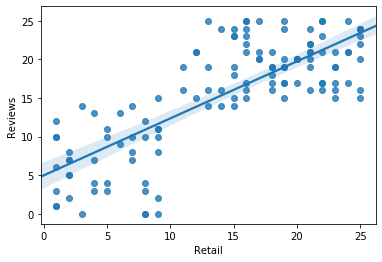

In [155]:
df.dropna(inplace=True)
import seaborn as sns
plot=sns.regplot(y=df['Reviews'],x=df['Retail'])

#### GENRIC WORKFLOW OF THE ANALYTICAL FRAMEWORK

![alt text](sp1.PNG "Title")


array([ 1.96359741,  1.43601697, -0.05356656])

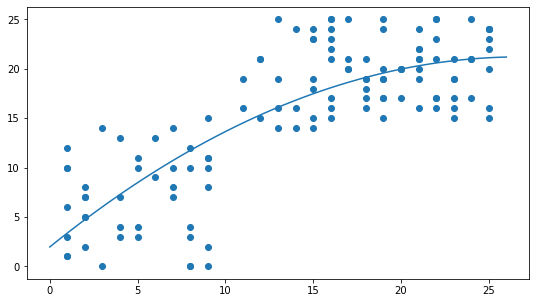

In [169]:
def nonlinear(plot:bool):
    
    def model(t,y,v,a):
        
        return y + v*t + 0.5*a*t**2
    
    initial_guess = [1,1,-10]
    fit = curve_fit(model,df['Retail'],df['Reviews'],p0 = initial_guess)
    
    ans,cov = fit
    fit_y0,fit_v0,fit_a = ans
    fit_sy0,fit_sv0,fit_sa = np.sqrt(np.diag(cov))
    
    if plot==True:
        
        plt.figure(figsize = (9,5))
        plt.scatter(df['Retail'],df['Reviews'], label="data")
        t = np.linspace(0,26)
        plt.plot(t,model(t,fit_y0,fit_v0,fit_a), label="model")
       
    return ans

nonlinear(True)


### PARABOLIC NON-LINEAR REGRESSION MODEL

Upon visualizing the data above, the best fit model could be estimated having a shape similar to a concave parabola. We continue with a parabolic equation for fitting the data. In here, we have assumed that the number of reviews would be an estimate of the sales of that product. We are thus, trying to establish a relationship between Retail Price and Sales.

![alt text](sp2.PNG "Title")


In [ ]:
def predict(retail_price): 
    
    predictions = []
    x = nonlinear(False)
    y = x[0]
    v = x[1]
    a = x[2]
    
    for t in retail_price:
        predictions.append(y + v*t + 0.5*a*t**2)
        
    return predictions  

The predict function fits data to the the defined curve. Please note that we can extract a graphic from the nonlinear function everytime we call it. We can control it by passing a boolean argument while calling the function. 

In [241]:
def analyze_sentiment(sentiments):
    
    features1 = np.array(sentiments['customer_reviews'])
    
    analyser = SentimentIntensityAnalyzer()
    processed_features = []
    positive = []
    
    for sentence in range(0, len(features1)):
        processed_feature = re.sub(r'\W', ' ', str(features1[sentence]))
        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
        processed_feature = re.sub(r'^b\s+', '', processed_feature)
        processed_feature = processed_feature.lower()
        processed_features.append(processed_feature)
    
    for i in range(0,len(processed_features),1):
        score = analyser.polarity_scores(processed_features[i])
        positive.append(score['pos'])
        
    
    return np.argsort(positive)[-10:]
   

### SENTIMENT ANALYZER

We now have a set of toys which are already available in the market; but we now have a decision to make on which ones to sell. Each toy has multiple comments populated against it from multiple customers and we need to see a bigger picture out of it to gauge an overall sentiment of the customers. Thereby, all these comments are preprocessed, amalgamated and sent through the VaderSentiment library in Python for each toy. The Sentiment analyzer quantifies these comments for each product in a dictionary and provides a score on a scale of 1.The scale is distributed based on a Positive, Negative & a Neutral factor of the outcome of the Sentiment Analyzer. We would only like to extract top 10 positive products, and these are the products we would try to sell. 

In [ ]:
def init():
    
    Retail_Price = []
    Manufacturer_Price = []
    
    new_prod = pd.read_csv(r'C:\Users\chinm\Desktop\final2.csv')
    val = analyze_sentiment(new_prod)
    
    for i in val:
        Retail_Price.append(new_prod[i:i+1]['Retail'].values[0])
        Manufacturer_Price.append(new_prod[i:i+1]['Manufacturer_Price'].values[0])

    Predicted_Sales = predict(Retail_Price)
    
    return pd.DataFrame(list(zip(Predicted_Sales,Manufacturer_Price,Retail_Price)),
                                 columns =['Predicted_Sales', 'Manufacturer_Price','Retail_Price'])

init()

### Price Optimization: Maximizing Profit

![alt text](sp3.PNG "Title")

Profit earned from each toy could be computed by the product of Sales & the amount earned out of each toy.Retail Price would be the price for which we essentially plan to sell the toy and Manufacturer Price would be the price for which we would purchase the toy for. The set of decision variables in our problem would the retail prices for each toy.The maximum amount which we would be investing is 2000 and we would also define a profit margin for the retail price as below; We set a maximum 30% percent profit margin of our retail price by having the retail price estimated 1.42 timesthan the manufacturer price. 

For solving the model, we construct a simple spreadsheet model, and use excel solver for solving the problem. 


![alt text](sp4.PNG "Title")


### CRITICAL THINKING

This research is based only on historical data. Startup costs and continuing expenses such as shipping fees and packaging costs were not factored into this analysis yet are essential to this equation. The assumption that No. of Reviews would be synonymous to Sales impacts the accuracy of the predictive model. 